### Salary_hike -> Build a prediction model for Salary_hike

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [32]:
df=pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [5]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [6]:
df.shape

(30, 2)

In [7]:
len(df)

30

In [8]:
df.isnull().sum().sum()

0

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.31,2.84,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.00,27414.43,37731.0,56720.75,65237.0,100544.75,122391.0


In [33]:
df = df.rename({'YearsExperience':'years_of_experience'},axis=1)
df = df.rename({'Salary':'salary'},axis=1)
df.head(1)

,years_of_experience,salary
0,1.1,39343.0


#### The independent variable is years_of_experience and dependent variable is salary.

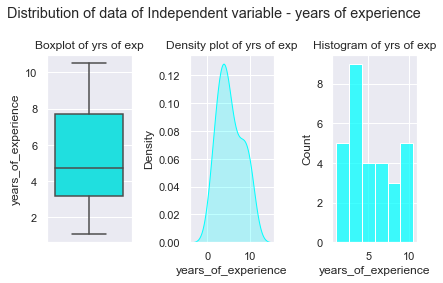

In [12]:
sns.set()

fig,axes=plt.subplots(1,3)
fig.suptitle('Distribution of data of Independent variable - years of experience')
sns.boxplot(data=df,y='years_of_experience',color='cyan',ax=axes[0])
axes[0].set_title('Boxplot of yrs of exp')
sns.kdeplot(data=df,x='years_of_experience',fill=True,color='cyan',ax=axes[1])
axes[1].set_title('Density plot of yrs of exp')
sns.histplot(data=df,x='years_of_experience',color='cyan',ax=axes[2])
axes[2].set_title('Histogram of yrs of exp')

plt.tight_layout();

#### From the boxplot we can conclude there are no outliers on the independent variable.

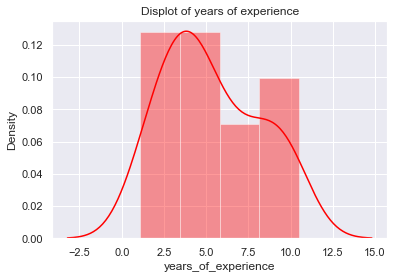

In [14]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.distplot(df['years_of_experience'],kde=True,color='red')
plt.title('Displot of years of experience');

In [15]:
# Shapiro-Wilk test
stats.shapiro(df['years_of_experience'])

ShapiroResult(statistic=0.9420627355575562, pvalue=0.10337740182876587)

##### As per shapiro wilk test pvalue = 0.1 which is > 0.05 so the data can be considered as normally distributed, though linear regression requires only the error component to be normally distributed.

### Assumptions of Linear Regression
#### -- Linear relationship between the dependent and the independent variables
#### -- Normally distributed error component
#### -- No multicollinearity (applies in case of multiple linear regression)
#### -- No heteroskedasticity, the variance of residuals must be constant across the predicted values

### Check for Linearity

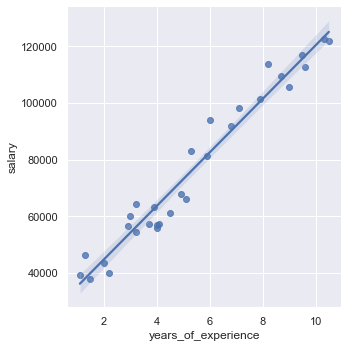

In [16]:
sns.lmplot(x='years_of_experience',y='salary',data=df,order=1);

##### As the years of experience has increased salary also increased. So the independent and dependent variable have linear relationship

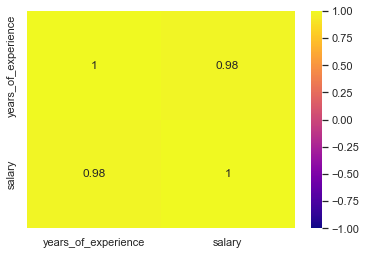

In [17]:
correlation = df.corr()
sns.heatmap(data=correlation,
           vmin=-1,vmax=1,
           cmap='plasma',annot=True);

#### 0.98 shows strong positive correlation between years of experience and salary.

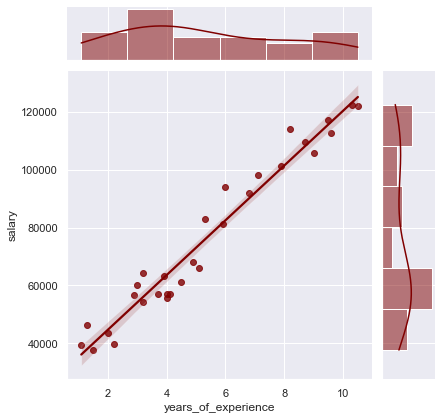

In [20]:
sns.jointplot(data=df,x='years_of_experience',y='salary',kind='reg',color='maroon');

### Split the dataset into dependent and independent variables as x and y

In [34]:
x = df.drop('salary',axis=1)
y = df['salary']
print('Shape of x=',x.shape)
print('Shape of y=',y.shape)

Shape of x= (30, 1)
Shape of y= (30,)


### Split into train and test dataset

In [35]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

print('Shape of x_train=',x_train.shape)
print('Shape of y_train=',y_train.shape)
print('Shape of x_test=',x_test.shape)
print('Shape of y_test=',y_test.shape)

Shape of x_train= (24, 1)
Shape of y_train= (24,)
Shape of x_test= (6, 1)
Shape of y_test= (6,)


### Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression

In [36]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [37]:
lr.coef_

array([9312.57512673])

In [38]:
lr.intercept_

26780.099150628186

In [52]:
xtest_pred_salary = lr.predict(x_test)
xtest_pred_salary

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [40]:
y_test

2      37731.0
28    122391.0
13     57081.0
10     63218.0
26    116969.0
24    109431.0
Name: salary, dtype: float64

In [41]:
lr.score(x_test,y_test)

0.988169515729126

### So the model is 99% accurate on test dataset.

### Train dataset

In [55]:
xtrain_pred_salary = lr.predict(x_train)
error = y_train - xtrain_pred_salary
df_train = pd.DataFrame(np.c_[x_train,y_train,xtrain_pred_salary,error],columns=['yrs_exp','sal_actual','pred_sal','diff'])
df_train.head()

,yrs_exp,sal_actual,pred_sal,diff
0,9.6,112635.0,116180.820367,-3545.820367
1,4.0,55794.0,64030.399658,-8236.399658
2,5.3,83088.0,76136.747322,6951.252678
3,7.9,101302.0,100349.442652,952.557348
4,2.9,56642.0,53786.567018,2855.432982


### Test dataset

In [58]:
error_t = y_test - xtest_pred_salary
df_test = pd.DataFrame(np.c_[x_test,y_test,xtest_pred_salary,error_t],columns=['yrs_exp','sal_actual','pred_sal','diff'])
df_test.head()

,yrs_exp,sal_actual,pred_sal,diff
0,1.5,37731.0,40748.961841,-3017.961841
1,10.3,122391.0,122699.622956,-308.622956
2,4.1,57081.0,64961.657170,-7880.657170
3,3.9,63218.0,63099.142145,118.857855
4,9.5,116969.0,115249.562855,1719.437145


### Visualization of Train and Test dataset

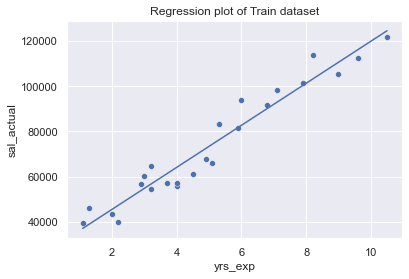

In [61]:
sns.scatterplot(x='yrs_exp',y='sal_actual',data=df_train)
sns.lineplot(data=df_train,x='yrs_exp',y='pred_sal')
plt.title('Regression plot of Train dataset');

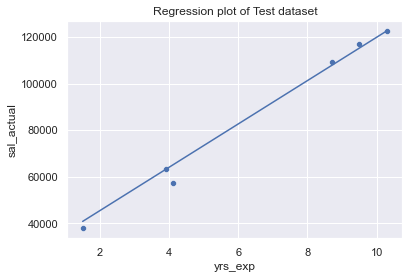

In [60]:
sns.scatterplot(x='yrs_exp',y='sal_actual',data=df_test)
sns.lineplot(data=df_test,x='yrs_exp',y='pred_sal')
plt.title('Regression plot of Test dataset');

#### Normal distribution of error :

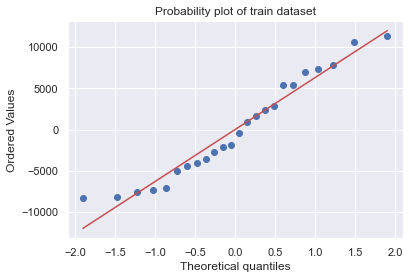

In [62]:
stats.probplot(df_train['diff'],dist='norm',plot=plt)
plt.title('Probability plot of train dataset');

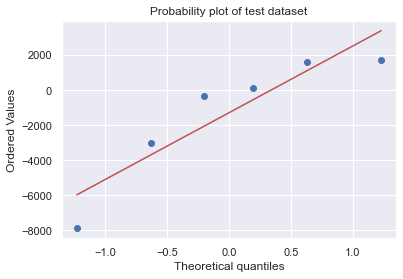

In [63]:
stats.probplot(df_test['diff'],dist='norm',plot=plt)
plt.title('Probability plot of test dataset');

#### Homoscedasticity :

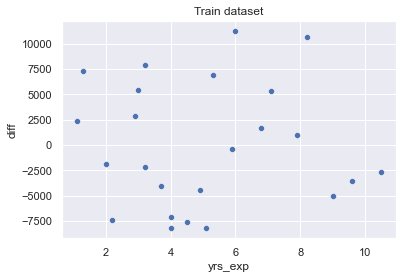

In [68]:
sns.scatterplot(x='yrs_exp',y='diff',data=df_train)
plt.title('Train dataset');

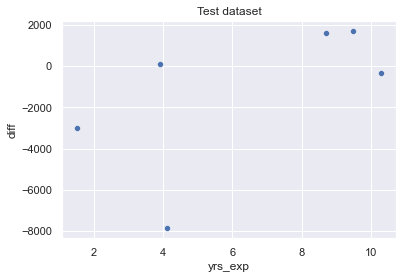

In [69]:
sns.scatterplot(x='yrs_exp',y='diff',data=df_test)
plt.title('Test dataset');

##### The error points are equally distributed - means constant variance.

### By using statsmodels.formula.api (another method)

### Log transformation

In [75]:
import statsmodels.formula.api as smf

In [76]:
df.head()

,years_of_experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [77]:
model = smf.ols('years_of_experience~salary',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     years_of_experience   R-squared:                       0.957
Model:                             OLS   Adj. R-squared:                  0.955
Method:                  Least Squares   F-statistic:                     622.5
Date:                 Mon, 07 Nov 2022   Prob (F-statistic):           1.14e-20
Time:                         06:31:45   Log-Likelihood:                -26.168
No. Observations:                   30   AIC:                             56.34
Df Residuals:                       28   BIC:                             59.14
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Square root transformation

In [78]:
model1 = smf.ols('np.sqrt(years_of_experience)~np.sqrt(salary)',df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     np.sqrt(years_of_experience)   R-squared:                       0.942
Model:                                      OLS   Adj. R-squared:                  0.940
Method:                           Least Squares   F-statistic:                     454.3
Date:                          Mon, 07 Nov 2022   Prob (F-statistic):           7.58e-19
Time:                                  06:34:57   Log-Likelihood:                 14.149
No. Observations:                            30   AIC:                            -24.30
Df Residuals:                                28   BIC:                            -21.49
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.1612      0.161     -7.208      0.000      -1.491      -0.831
np.sqrt(salary)     0.0125      0.001     21.315      0.000       0.011       0.014
==============================================================================
Omnibus:                        1.382   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.501   Jarque-Bera (JB):                1.219
Skew:                          -0.461   Prob(JB):                        0.544
Kurtosis:                       2.646   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Cube root transformation

In [79]:
model2 = smf.ols('np.cbrt(years_of_experience)~np.cbrt(salary)',df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     np.cbrt(years_of_experience)   R-squared:                       0.932
Model:                                      OLS   Adj. R-squared:                  0.930
Method:                           Least Squares   F-statistic:                     386.5
Date:                          Mon, 07 Nov 2022   Prob (F-statistic):           6.37e-18
Time:                                  06:36:41   Log-Likelihood:                 31.493
No. Observations:                            30   AIC:                            -58.99
Df Residuals:                                28   BIC:                            -56.18
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.9290      0.134     -6.937      0.000      -1.203      -0.655
np.cbrt(salary)     0.0626      0.003     19.659      0.000       0.056       0.069
==============================================================================
Omnibus:                        2.479   Durbin-Watson:                   1.156
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                1.612
Skew:                          -0.564   Prob(JB):                        0.447
Kurtosis:                       3.124   Cond. No.                         352.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Comparing all the models, the one without taking any transformations has given best results where r2 = 0.957

### Test on Custom dataset

In [73]:
import warnings
warnings.filterwarnings("ignore")
exp = 4
lr.predict([[exp]])[0]
print(f"Salary for {exp} year experienced = {int(lr.predict([[exp]])[0])}")

Salary for 4 year experienced = 64030


In [74]:
exp = 10
lr.predict([[exp]])[0]
print(f"Salary for {exp} year experienced = {int(lr.predict([[exp]])[0])}")

Salary for 10 year experienced = 119905
